In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile
import re

pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")

## Importing Data

In [2]:
with open('data/realdonaldtrump_tweets.json', 'r') as f:
    all_tweets = json.load(f)

In [3]:
from pprint import pprint # to get a more easily-readable view.
pprint(all_tweets[-1])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 16 18:40:18 +0000 2018',
 'display_text_range': [0, 174],
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 52115,
 'favorited': False,
 'full_text': 'Just spoke with the Crown Prince of Saudi Arabia who totally '
              'denied any knowledge of what took place in their Turkish '
              'Consulate. He was with Secretary of State Mike Pompeo...',
 'geo': None,
 'id': 1052268011900555265,
 'id_str': '1052268011900555265',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 13493,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'user': {'contributors_enabled': False,
  

In [4]:
trump = pd.DataFrame(all_tweets)

trump['created_at'] = pd.to_datetime(trump['created_at'])
trump = trump.loc[:, ['id', 'full_text', 'created_at', 'source', 'text', 'retweet_count']]
trump['text'] = trump['text'].fillna(trump['full_text'])
trump = trump.drop('full_text', axis=1).rename(index=str, columns={'created_at':'time'})
trump.set_index('id', inplace=True)

trump.head()

,time,source,text,retweet_count
id,,,,
786204978629185536,2016-10-12 14:00:48+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,24915
786201435486781440,2016-10-12 13:46:43+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,22609
786189446274248704,2016-10-12 12:59:05+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329
786054986534969344,2016-10-12 04:04:47+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,18789
786007502639038464,2016-10-12 00:56:06+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",7761


## Tweet Source Analysis

In [5]:
# Examining the source field
trump['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M5)</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>',
       '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],
      dtype=object)

In [6]:
temp = trump['source'].str.replace(r'<a href="https*://', "")
temp = temp.str.replace(r'.+">', "")
trump['source'] = temp.str.replace('</a>', "")

In [7]:
# Test 
trump['source'].unique()

array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web Client',
       'Media Studio', 'Twitter for iPad', 'Instagram', 'Mobile Web (M5)',
       'Twitter Ads', 'Periscope', 'Twitter Media Studio'], dtype=object)

### Examining Most Commonly Used Devices

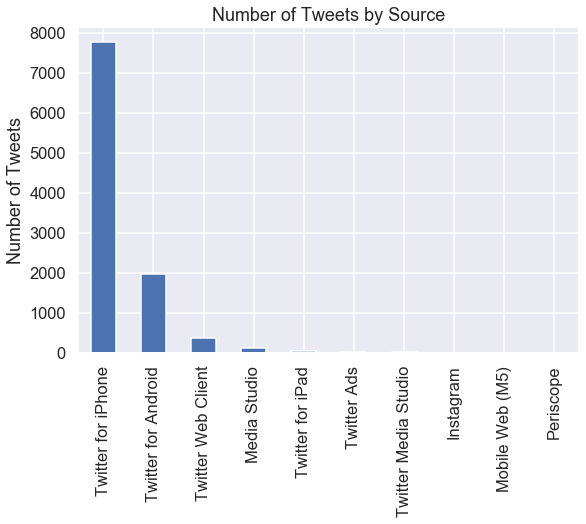

In [8]:
plt.figure(figsize=(8, 6))
trump['source'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Source");

### Distribution of Tweet Sources

In [9]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

trump['year'] = trump['time'].apply(year_fraction)

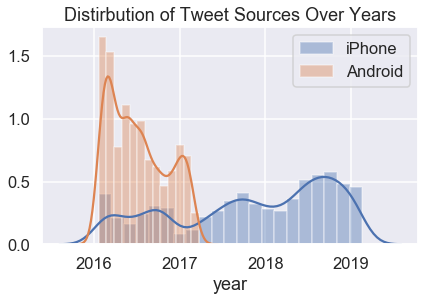

In [10]:
sns.distplot(trump[trump['source'] == 'Twitter for iPhone']['year']);
sns.distplot(trump[trump['source'] == 'Twitter for Android']['year']);
plt.title('Distirbution of Tweet Sources Over Years');
plt.legend(['iPhone', 'Android']);

### Analyzing Difference in Tweet Times Across Devices

In [11]:
for tweet in all_tweets[:3]:
    print(tweet['created_at'])

Wed Oct 12 14:00:48 +0000 2016
Wed Oct 12 13:46:43 +0000 2016
Wed Oct 12 12:59:05 +0000 2016


In [12]:
trump['est_time'] = trump['time'].dt.tz_convert("EST") # Convert to Eastern Time
trump.head()

,time,source,text,retweet_count,year,est_time
id,,,,,,
786204978629185536,2016-10-12 14:00:48+00:00,Twitter for iPhone,PAY TO PLAY POLITICS. \n#CrookedHillary https://t.co/wjsl8ITVvk,24915,2016.778689,2016-10-12 09:00:48-05:00
786201435486781440,2016-10-12 13:46:43+00:00,Twitter for iPhone,Very little pick-up by the dishonest media of incredible information provided by WikiLeaks. So dishonest! Rigged system!,22609,2016.778689,2016-10-12 08:46:43-05:00
786189446274248704,2016-10-12 12:59:05+00:00,Twitter for Android,Crooked Hillary Clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329,2016.778689,2016-10-12 07:59:05-05:00
786054986534969344,2016-10-12 04:04:47+00:00,Twitter for iPhone,Thank you Florida- a MOVEMENT that has never been seen before and will never be seen again. Lets get out &amp;… https://t.co/t9XM9wFDZI,18789,2016.778689,2016-10-11 23:04:47-05:00
786007502639038464,2016-10-12 00:56:06+00:00,Twitter for iPhone,"Join me Thursday in Florida &amp; Ohio!\nWest Palm Beach, FL at noon:\nhttps://t.co/jwbZnQhxg9\nCincinnati, OH this 7:30pm:\nhttps://t.co/5w2UhalPIx",7761,2016.778689,2016-10-11 19:56:06-05:00


In [13]:
trump['hour'] = trump['est_time'].dt.hour + (trump['est_time'].dt.minute/60) + (trump['est_time'].dt.second/3600)

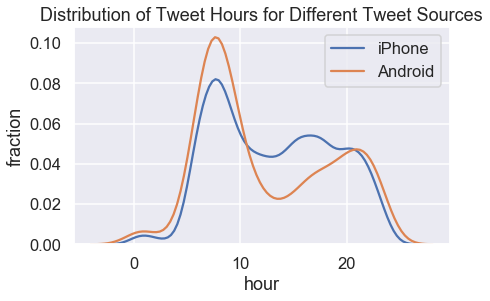

In [14]:
# Graphing distributions over hour of day
sns.distplot(trump[trump['source'] == 'Twitter for iPhone']['hour'], hist=False, label='iPhone');
sns.distplot(trump[trump['source'] == 'Twitter for Android']['hour'], hist=False, label='Android');
plt.title('Distribution of Tweet Hours for Different Tweet Sources');
plt.ylabel('fraction');

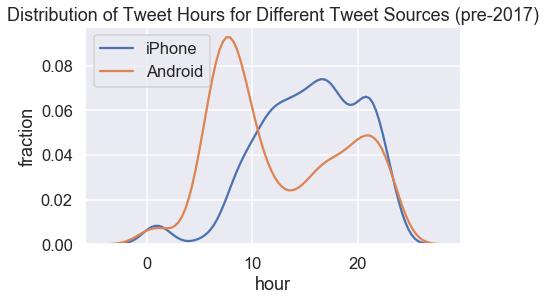

In [15]:
# Graphing distributions pre-2017 (switch from Android to iPhone)
sns.distplot(trump[(trump['source'] == 'Twitter for iPhone') & (trump['year'] < 2017)]['hour'], hist=False, label='iPhone');
sns.distplot(trump[(trump['source'] == 'Twitter for Android') & (trump['year'] < 2017)]['hour'], hist=False, label='Android');
plt.title('Distribution of Tweet Hours for Different Tweet Sources (pre-2017)');
plt.ylabel('fraction');
plt.legend(loc='upper left');

## Sentiment Analysis

### Importing VADER lexicon

In [16]:
sent = pd.read_csv('vader_lexicon.txt', sep='\t',
                   usecols=[0, 1], header=None, names=['token', 'polarity'],
                   index_col='token')
sent.head()

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


### Calculating overall sentiments for each tweet

In [17]:
trump['text'] = trump['text'].str.lower()
words = [str(list(trump['text'])[i]).split() for i in np.arange(len(trump['text']))]

alternate = sent.reset_index()
total = []

for i in np.arange(len(words)):
    sentiments = []
    for j in np.arange(len(words[i])):
        if words[i][j] in np.array(alternate['token']):
            sentiments.append(sent.loc[words[i][j]])
    total.append(sentiments)
total = [sum(total[i]) for i in np.arange(len(total))]

In [18]:
# Getting rid of punctuation
punct_re = r'[^\w\s]'
trump['no_punc'] = trump['text'].str.replace(punct_re, ' ')

### Converting tweets to tidy format

In [19]:
tidy_format = (
    trump['no_punc']
    .str.split(expand=True)
    .stack()
    .reset_index(level=1)
    .rename(columns={'level_1': 'num', 0: 'word'})
)
tidy_format.head()

,num,word
id,,
786204978629185536,0,pay
786204978629185536,1,to
786204978629185536,2,play
786204978629185536,3,politics
786204978629185536,4,crookedhillary


### Assigning polarities to each tweet

In [20]:
new_polarity = (tidy_format
 .merge(sent, left_on='word', right_index=True)
 .groupby('id')
 .sum()
 .fillna(0)
)

new_polarity.head()

,num,polarity
id,,
690171403388104704,10,-2.6
690173226341691392,27,-6.0
690176882055114758,39,4.3
690180284189310976,38,-2.6
690271688127213568,18,-5.2


In [21]:
trump = trump.merge(new_polarity, on='id').drop(columns='num')
trump.head()

,time,source,text,retweet_count,year,est_time,hour,no_punc,polarity
id,,,,,,,,,
786204978629185536,2016-10-12 14:00:48+00:00,Twitter for iPhone,pay to play politics. \n#crookedhillary https://t.co/wjsl8itvvk,24915,2016.778689,2016-10-12 09:00:48-05:00,9.013333,pay to play politics \n crookedhillary https t co wjsl8itvvk,1.0
786201435486781440,2016-10-12 13:46:43+00:00,Twitter for iPhone,very little pick-up by the dishonest media of incredible information provided by wikileaks. so dishonest! rigged system!,22609,2016.778689,2016-10-12 08:46:43-05:00,8.778611,very little pick up by the dishonest media of incredible information provided by wikileaks so dishonest rigged system,-6.9
786189446274248704,2016-10-12 12:59:05+00:00,Twitter for Android,crooked hillary clinton likes to talk about the things she will do but she has been there for 30 years - why didn't she do them?,18329,2016.778689,2016-10-12 07:59:05-05:00,7.984722,crooked hillary clinton likes to talk about the things she will do but she has been there for 30 years why didn t she do them,1.8
786054986534969344,2016-10-12 04:04:47+00:00,Twitter for iPhone,thank you florida- a movement that has never been seen before and will never be seen again. lets get out &amp;… https://t.co/t9xm9wfdzi,18789,2016.778689,2016-10-11 23:04:47-05:00,23.079722,thank you florida a movement that has never been seen before and will never be seen again lets get out amp https t co t9xm9wfdzi,1.5
786007502639038464,2016-10-12 00:56:06+00:00,Twitter for iPhone,"join me thursday in florida &amp; ohio!\nwest palm beach, fl at noon:\nhttps://t.co/jwbznqhxg9\ncincinnati, oh this 7:30pm:\nhttps://t.co/5w2uhalpix",7761,2016.778689,2016-10-11 19:56:06-05:00,19.935000,join me thursday in florida amp ohio \nwest palm beach fl at noon \nhttps t co jwbznqhxg9\ncincinnati oh this 7 30pm \nhttps t co 5w2uhalpix,1.2


## Most Polarized Tweets

In [22]:
print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

Most negative tweets:

   the trump portrait of an unsustainable border crisis is dead on. “in the last two years, ice officers made 266,000 arrests of aliens with criminal records, including those charged or convicted of 100,000 assaults, 30,000 sex crimes &amp; 4000 violent killings.” america’s southern....

   it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!

   the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!

   ...this evil anti-semitic attack is an assault on humanity. it will take all of us working together to extract the poison of an

In [23]:
print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

Most positive tweets:

   congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!

   congratulations to a truly great football team, the clemson tigers, on an incredible win last night against a powerful alabama team. a big win also for the great state of south carolina. look forward to seeing the team, and their brilliant coach, for the second time at the w.h.

   my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!

   thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new

## Distributions of Tweet Sentiments Containing Keywords

### NY Times vs. Fox News

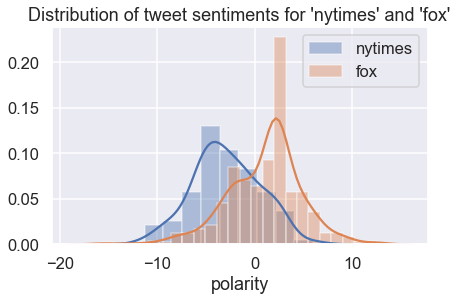

In [24]:
sns.distplot(trump[trump['no_punc'].str.contains('nytimes')]['polarity']);
sns.distplot(trump[trump['no_punc'].str.contains('fox')]['polarity']);
plt.title('Distribution of tweet sentiments for \'nytimes\' and \'fox\'');
plt.legend(['nytimes', 'fox']);

### Democrat vs. Republican

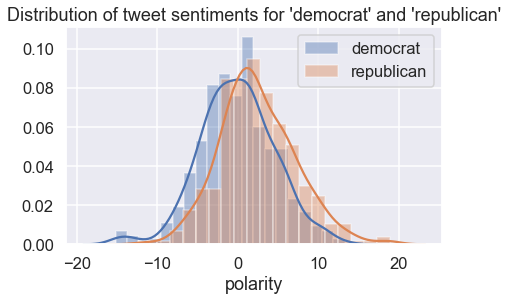

In [25]:
sns.distplot(trump[trump['no_punc'].str.contains('democrat')]['polarity']);
sns.distplot(trump[trump['no_punc'].str.contains('republican')]['polarity']);
plt.title('Distribution of tweet sentiments for \'democrat\' and \'republican\'');
plt.legend(['democrat', 'republican']);